In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from numpy import array,array_equal
from sklearn.metrics import roc_auc_score, average_precision_score

gini = 2×AUC−1

In [66]:
train = pd.read_csv('../Datasets/porto-seguro-safe-driver-prediction/train.csv')
test = pd.read_csv('../Datasets/porto-seguro-safe-driver-prediction/test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [17]:
train.shape,test.shape

((595212, 59), (892816, 58))

In [5]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,8.928160e+05,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,...,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,7.441535e+05,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,...,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,4.296830e+05,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,...,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720218e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.443070e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.116308e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488026e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,11.000000,15.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.isnull().sum(axis=0)

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [9]:
train.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
595207    0
595208    0
595209    0
595210    0
595211    0
Length: 595212, dtype: int64

In [11]:
feats_counts = train.nunique(dropna = False)
feats_counts.sort_values().head(25)

ps_calc_20_bin    2
ps_ind_18_bin     2
ps_ind_17_bin     2
ps_ind_16_bin     2
ps_calc_19_bin    2
ps_car_08_cat     2
ps_ind_13_bin     2
ps_ind_12_bin     2
ps_ind_11_bin     2
ps_ind_09_bin     2
ps_ind_10_bin     2
ps_ind_07_bin     2
ps_ind_06_bin     2
ps_calc_15_bin    2
ps_calc_16_bin    2
ps_calc_17_bin    2
ps_calc_18_bin    2
target            2
ps_ind_08_bin     2
ps_car_03_cat     3
ps_car_10_cat     3
ps_car_05_cat     3
ps_car_02_cat     3
ps_car_07_cat     3
ps_ind_04_cat     3
dtype: int64

In [12]:
feats_counts.sort_values().tail(25)

ps_calc_07           10
ps_calc_02           10
ps_calc_03           10
ps_calc_01           10
ps_car_04_cat        10
ps_reg_01            10
ps_calc_12           11
ps_calc_06           11
ps_calc_08           11
ps_ind_03            12
ps_car_01_cat        13
ps_calc_13           14
ps_ind_15            14
ps_car_15            15
ps_car_06_cat        18
ps_reg_02            19
ps_calc_11           20
ps_calc_14           24
ps_calc_10           26
ps_car_11_cat       104
ps_car_12           184
ps_car_14           850
ps_reg_03          5013
ps_car_13         70482
id               595212
dtype: int64

In [13]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

In [15]:
train_plot = train.drop(columns='target')

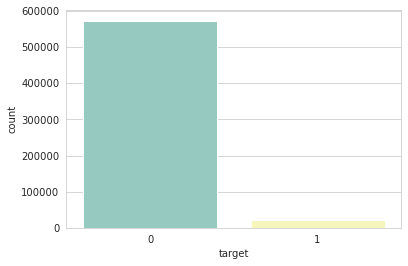

In [20]:
sns.countplot(x = train['target'], palette='Set3');

In [21]:
print("There are {}% target values with 1".format(100 * train["target"].value_counts()[1]/train.shape[0]))

There are 3.6447517859182947% target values with 1


In [25]:
def identify_constant_features(dataframe):
    count_uniques = dataframe.apply(lambda x: len(x.unique()))
    constants = count_uniques[count_uniques == 1].index.tolist()
    return constants

In [26]:
constant_features_train = set(identify_constant_features(train))
print('There were {} constant features in TRAIN dataset.'.format(
        len(constant_features_train)))

There were 0 constant features in TRAIN dataset.


In [27]:
def identify_equal_features(dataframe):
    features_to_compare = list(combinations(dataframe.columns.tolist(),2))
    equal_features = []
    for compare in features_to_compare:
        is_equal = array_equal(dataframe[compare[0]],dataframe[compare[1]])
        if is_equal:
            equal_features.append(list(compare))
    return equal_features

In [32]:
equal_features_train = identify_equal_features(train)
print('There were {} pairs of equal features in TRAIN dataset.'.format(len(equal_features_train)))

There were 0 pairs of equal features in TRAIN dataset.


In [67]:
target = train['target']
train.drop(columns = 'target', inplace=True)

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=0.50, random_state=42)

In [87]:
y_train[y_train == 1]

542236    1
171016    1
64482     1
310341    1
176757    1
         ..
15708     1
482690    1
301648    1
535822    1
137337    1
Name: target, Length: 10806, dtype: int64

In [88]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(class_weight = 'balanced', n_estimators=400, max_depth=2)

clf.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', max_depth=2, n_estimators=400)

In [89]:
y_pred_lgbm = clf.predict_proba(X_valid)[:,1]

In [90]:
y_pred_lgbm

array([0.48352732, 0.58034243, 0.44156075, ..., 0.73058467, 0.49214235,
       0.29090028])

In [91]:
def gini_normalized(y_actual, y_pred):
    """Simple normalized Gini based on Scikit-Learn's roc_auc_score"""
    
    # If the predictions y_pred are binary class probabilities
    if y_pred.ndim == 2:
        if y_pred.shape[1] == 2:
            y_pred = y_pred[:, 1]
    gini = lambda a, p: 2 * roc_auc_score(a, p) - 1
    return gini(y_actual, y_pred) / gini(y_actual, y_actual)

In [92]:
gini_normalized(y_valid, y_pred_lgbm)

0.27164068869631874

In [93]:
prediction = clf.predict_proba(test)[:,1]

In [59]:
sub = pd.read_csv('../Datasets/porto-seguro-safe-driver-prediction/sample_submission.csv')

In [77]:
submission = pd.DataFrame()
submission['id'] = sub['id']
submission['target'] = prediction

In [78]:
submission.to_csv('../Datasets/submission0.csv', index=False)